# Survey Evaluation

In [1]:
%%bash
jq -s . results/*.json > all_results.json

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15)

In [3]:
with open("all_results.json","rb") as f:
    results = json.load(f)

In [4]:
# extract questions
o = results[0][list(results[0].keys())[0]]

In [5]:
questions = list(o.keys())

In [6]:
bin_questions = []
range_questions = []

for q in questions:
    if len(o[q]) == 1:
        range_questions.append(q)
    else:
        bin_questions.append(q)

In [7]:
bin_questions

['Is this a valid recipe?', 'Does it seem eatable?']

In [8]:
range_questions

['Are the instructions understandable? (0: totally confusing, 3: very clear)',
 'How tasty is it probably? (0: not at all, 3: very tasty)',
 'Would you cook it? (0: not at all, 3: immediately!)',
 'How creative is this recipe? (0: not at all, 3: very creative!)',
 'Is this a good combination of ingredients? (0: not at all, 3: very good!)',
 'Are the used cooking actions suitable for the ingredients? (0: not at all, 3: totally!)']

## answers for each recipe:

In [9]:
recipes = {}
for res in results:
    for r in res:
        if r in recipes:
            recipes[r] += 1
        else:
            recipes[r] = 1
sorted_recipe_names = sorted(recipes.keys())
sorted_values = [recipes[r] for r in sorted_recipe_names]

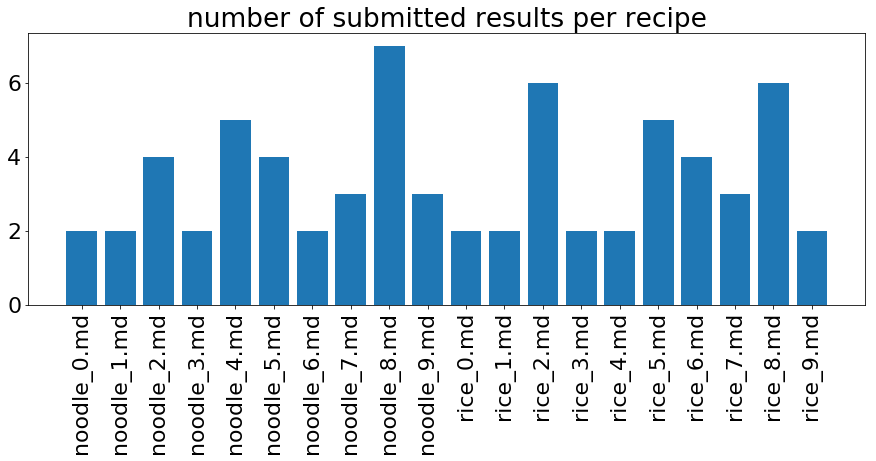

In [10]:
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams.update({'font.size': 22})
plt.bar(x = sorted_recipe_names, height=sorted_values)
plt.xticks(rotation=90)
plt.title("number of submitted results per recipe")
plt.show()

In [11]:
def get_bin_answer(q):
    yes = {}
    no = {}
    
    for r in sorted_recipe_names:
        yes[r] = 0
        no[r] = 0
    
    for res in results:
        for r in res:
            if res[r][q] == "Yes":
                yes[r] += 1
            else:
                no[r] += 1
    
    return sorted_recipe_names, [yes[r] for r in sorted_recipe_names], [no[r] for r in sorted_recipe_names]


In [12]:
def get_range_answer(q, ranges=4):
    answers = {}
    
    for r in sorted_recipe_names:
        answers[r] = [0] * ranges
    
    for res in results:
        for r in res:
            answers[r][int(res[r][q])] += 1
    
    l = []
    for i in range(ranges):
        l.append([answers[r][i] for r in sorted_recipe_names])
    
    return sorted_recipe_names, l

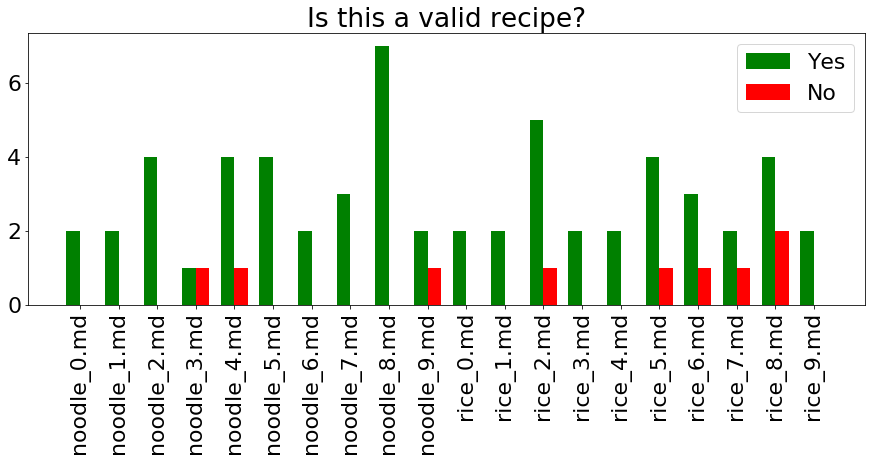

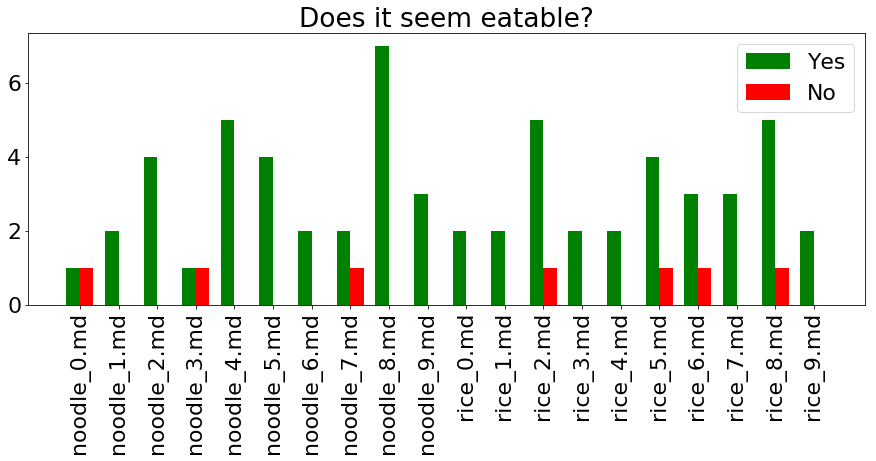

In [13]:
for q in bin_questions:
    answer = get_bin_answer(q)
    
    x = np.arange(len(sorted_recipe_names)) 

    width = 0.35  # the width of the bars

    plt.rcParams['figure.figsize'] = (15,5)
    plt.rcParams.update({'font.size': 22})
    plt.bar(x = x-width/2, height=answer[1], width=width, label="Yes", color='g')
    plt.bar(x = x+width/2, height=answer[2], width=width, label="No", color='r')
    plt.xticks(x, labels=sorted_recipe_names, rotation=90)
    plt.title(q)
    plt.legend()
    plt.savefig("bin_"+q+".pdf")
    plt.show()

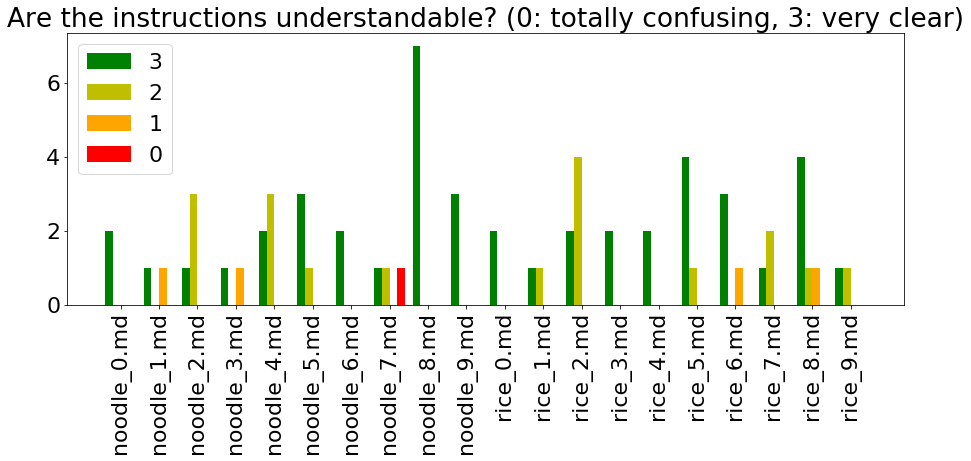

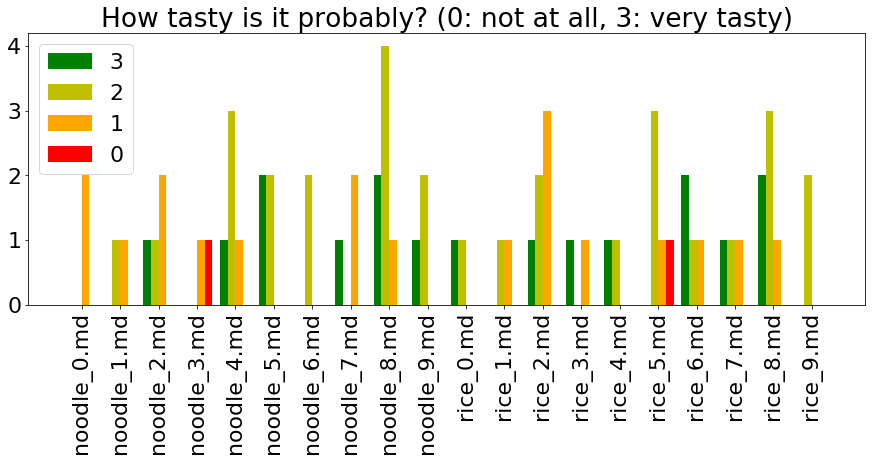

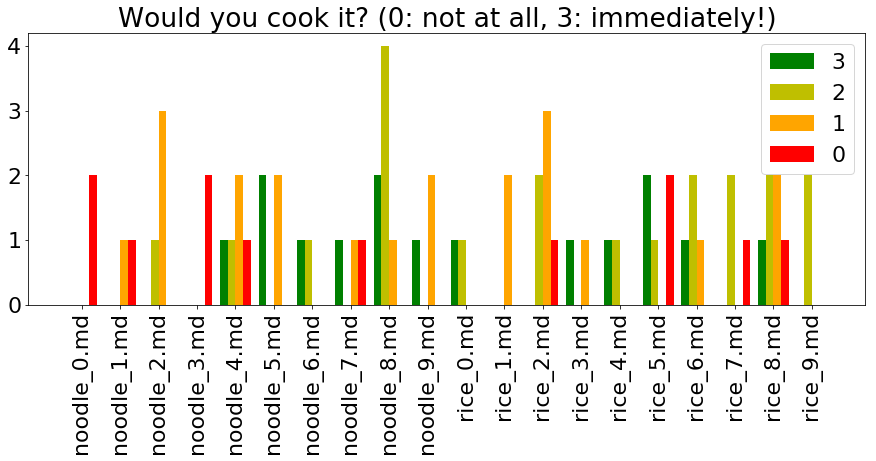

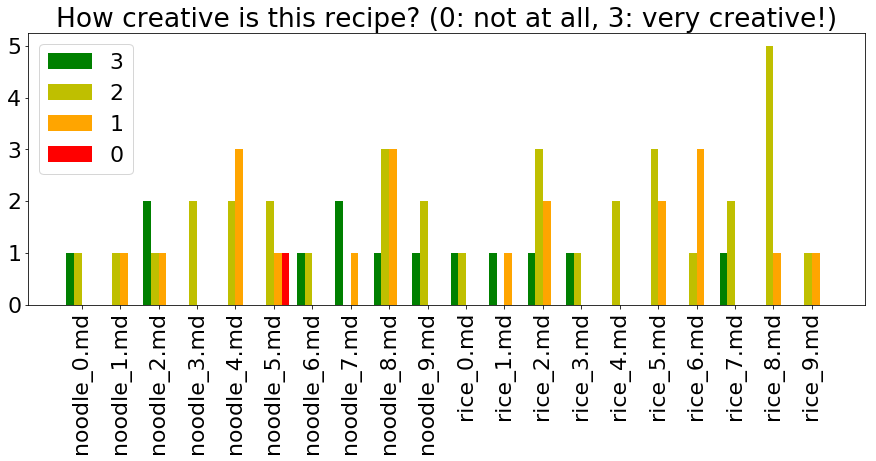

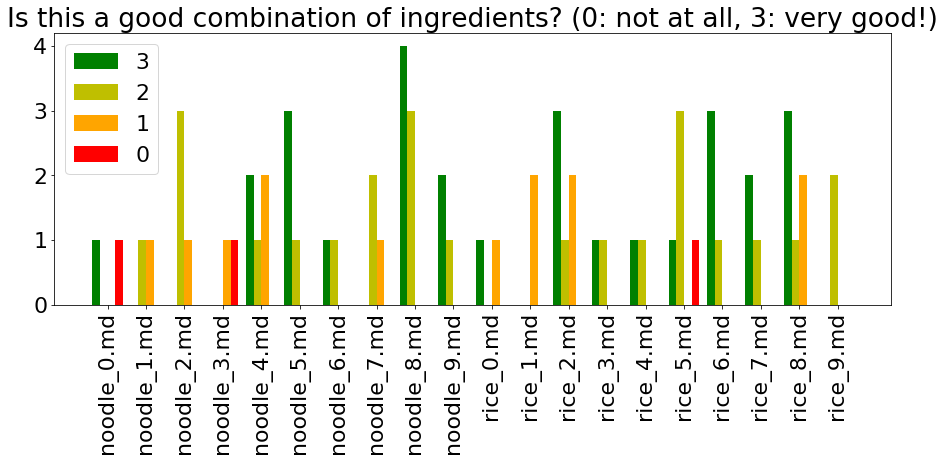

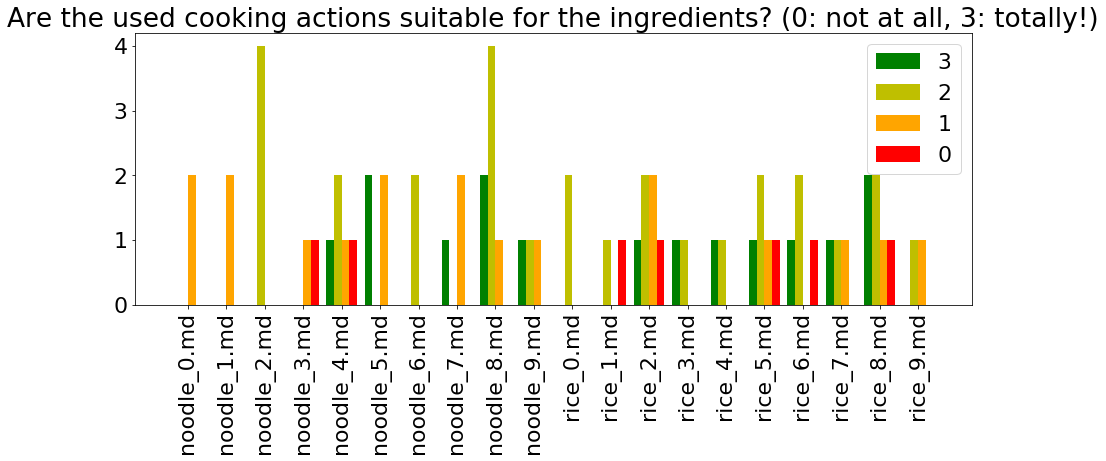

In [14]:
for q in range_questions:
    answer = get_range_answer(q)
    
    x = np.arange(len(sorted_recipe_names)) 

    width = 0.2 # the width of the bars

    plt.rcParams['figure.figsize'] = (15,5)
    plt.rcParams.update({'font.size': 22})
    plt.bar(x = x-1.5*width, height=answer[1][3], width=width, label="3", color='g')
    plt.bar(x = x-width/2, height=answer[1][2], width=width, label="2", color='y')
    plt.bar(x = x+width/2, height=answer[1][1], width=width, label="1", color = 'orange')
    plt.bar(x = x+1.5*width, height=answer[1][0], width=width, label="0", color='r')
    plt.xticks(x, labels=sorted_recipe_names, rotation=90)
    plt.title(q)
    plt.legend()
    plt.show()

## answers for each group:

In [15]:
def get_bin_group_answer(answers):
    yes = {}
    no = {}
    
    for r in sorted_recipe_names:
        grp = r.split('_')[0]
        if grp not in yes:
            yes[grp] = 0
            no[grp] = 0
    
    for res in results:
        for r in res:
            grp = r.split('_')[0]
            if res[r][q] == "Yes":
                yes[grp] += 1
            else:
                no[grp] += 1
                
    keys= list(yes.keys())
    
    return keys, [yes[r] for r in keys], [no[r] for r in keys]

In [16]:
def get_range_group_answer(q, ranges=4):
    answers = {}
    
    for r in sorted_recipe_names:
        grp = r.split('_')[0]
        if grp not in answers:
            answers[grp] = [0] * ranges
    
    for res in results:
        for r in res:
            grp = r.split('_')[0]
            answers[grp][int(res[r][q])] += 1
    
    
    keys= list(answers.keys())
    l = []
    for i in range(ranges):
        l.append([answers[r][i] for r in keys])
    
    
    
    return keys, l

Is this a valid recipe?
(['noodle', 'rice'], [31, 28], [3, 6])


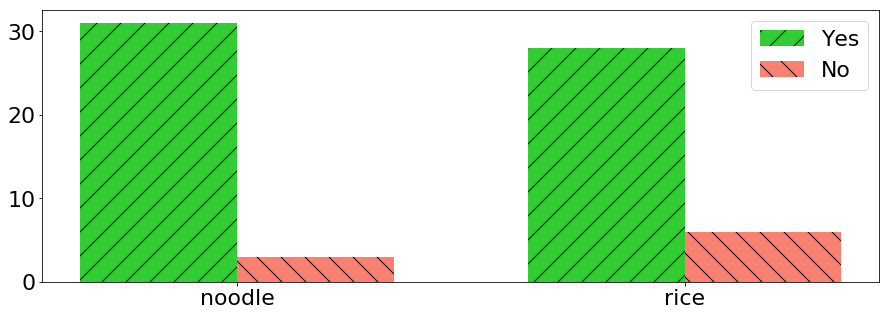

Does it seem eatable?
(['noodle', 'rice'], [31, 30], [3, 4])


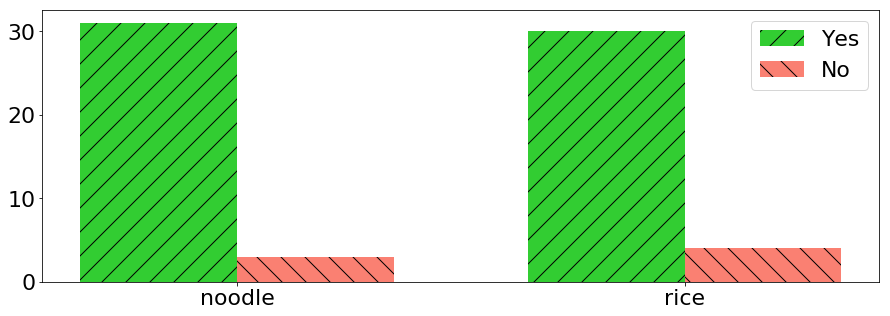

In [17]:
for q in bin_questions:
    print(q)
    answer = get_bin_group_answer(q)
    print(answer)   
    x = np.arange(len(answer[0])) 

    width = 0.35  # the width of the bars

    plt.rcParams['figure.figsize'] = (15,5)
    plt.rcParams.update({'font.size': 22})
    plt.bar(x = x-width/2, height=answer[1], width=width, label="Yes", color='limegreen', hatch="/")
    plt.bar(x = x+width/2, height=answer[2], width=width, label="No", color='salmon', hatch="\\")
    plt.xticks(x, labels=answer[0], rotation=0)
    #plt.title(q)
    plt.legend()
    plt.savefig("bin_"+q.split('(')[0].replace(" ","_").replace("?","")+".svg")
    plt.show()

Are the instructions understandable? (0: totally confusing, 3: very clear)
(['noodle', 'rice'], [[1, 0], [2, 2], [8, 10], [23, 22]])


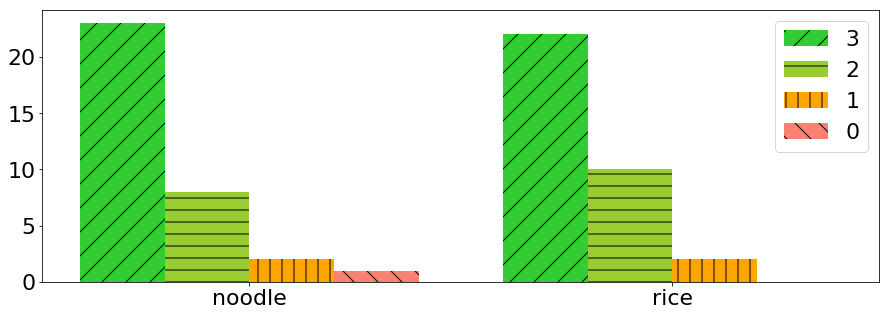

How tasty is it probably? (0: not at all, 3: very tasty)
(['noodle', 'rice'], [[1, 1], [10, 9], [15, 15], [8, 9]])


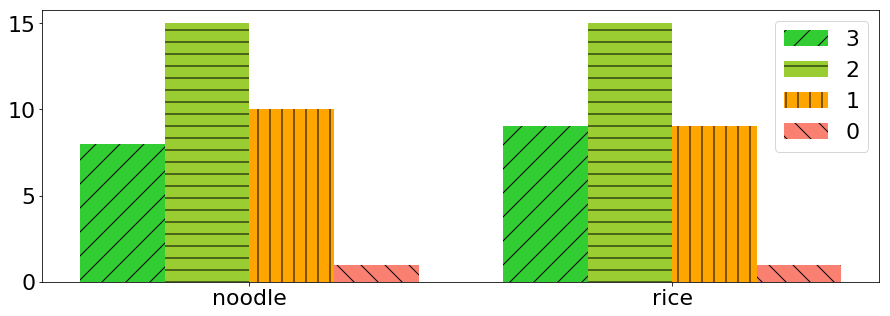

Would you cook it? (0: not at all, 3: immediately!)
(['noodle', 'rice'], [[7, 5], [12, 9], [7, 13], [8, 7]])


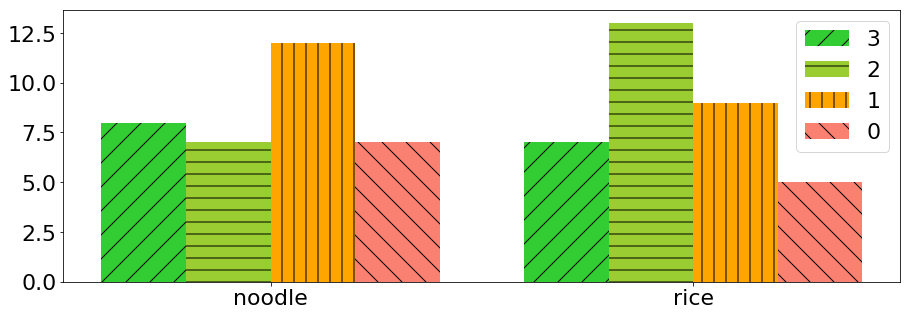

How creative is this recipe? (0: not at all, 3: very creative!)
(['noodle', 'rice'], [[1, 0], [10, 10], [15, 19], [8, 5]])


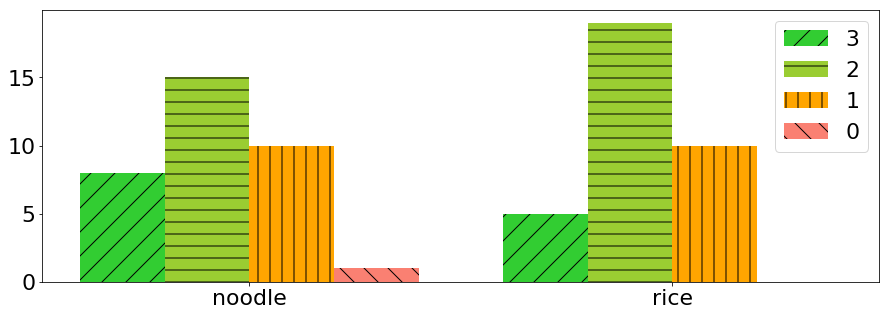

Is this a good combination of ingredients? (0: not at all, 3: very good!)
(['noodle', 'rice'], [[2, 1], [6, 7], [13, 11], [13, 15]])


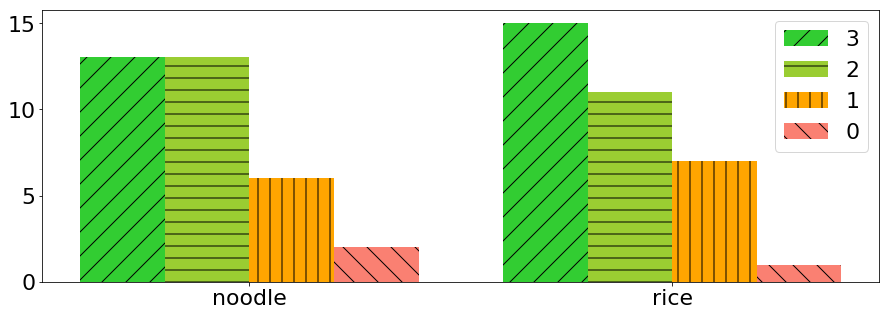

Are the used cooking actions suitable for the ingredients? (0: not at all, 3: totally!)
(['noodle', 'rice'], [[2, 5], [12, 6], [13, 15], [7, 8]])


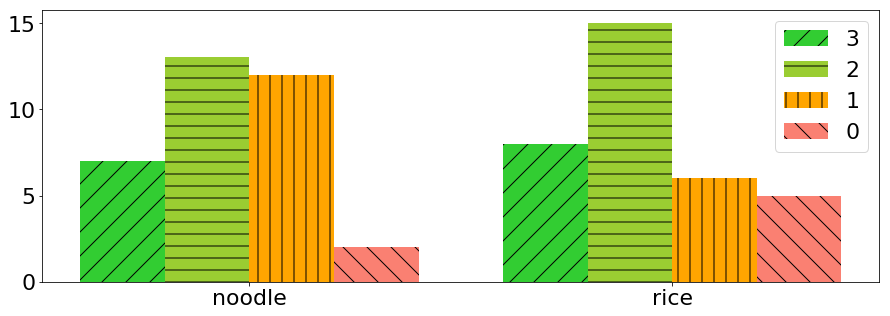

In [18]:
for q in range_questions:
    print(q)
    answer = get_range_group_answer(q)
    print (answer)
    
    x = np.arange(len(answer[0])) 

    width = 0.2 # the width of the bars

    plt.rcParams['figure.figsize'] = (15,5)
    plt.rcParams.update({'font.size': 22})
    plt.bar(x = x-1.5*width, height=answer[1][3], width=width, label="3", color='limegreen', hatch="/")
    plt.bar(x = x-width/2, height=answer[1][2], width=width, label="2", color='yellowgreen', hatch="-")
    plt.bar(x = x+width/2, height=answer[1][1], width=width, label="1", color='orange', hatch="|")
    plt.bar(x = x+1.5*width, height=answer[1][0], width=width, label="0", color='salmon', hatch="\\")
    plt.xticks(x, labels=answer[0], rotation=0)
    #plt.title(q)
    plt.legend()
    plt.savefig("range_"+q.split('(')[0].replace(" ","_").replace("?","")+".svg")
    plt.show()

In [19]:
all_results = {}

for q in bin_questions:
    all_results[q] = {}
    bin_res = {}
    for res in results:
        for r in res:
            if r not in all_results[q]:
                all_results[q][r] = int(res[r][q] == "Yes")
            else:
                all_results[q][r] += int(res[r][q] == "Yes")
    for r in recipes:
        all_results[q][r] /= recipes[r]
        
for q in range_questions:
    all_results[q] = {}
    for res in results:
        for r in res:
            if r not in all_results[q]:
                all_results[q][r] = int(res[r][q])
            else:
                all_results[q][r] += int(res[r][q])
    for r in recipes:
        all_results[q][r] /= recipes[r]

In [20]:
with open("question_results.json","w") as f:
    json.dump(all_results,f)

In [21]:
print(recipes)

{'noodle_8.md': 7, 'noodle_3.md': 2, 'rice_8.md': 6, 'rice_2.md': 6, 'rice_0.md': 2, 'noodle_5.md': 4, 'rice_9.md': 2, 'rice_6.md': 4, 'rice_5.md': 5, 'noodle_4.md': 5, 'rice_3.md': 2, 'rice_4.md': 2, 'rice_7.md': 3, 'noodle_2.md': 4, 'noodle_1.md': 2, 'noodle_7.md': 3, 'noodle_6.md': 2, 'noodle_9.md': 3, 'rice_1.md': 2, 'noodle_0.md': 2}


In [22]:
[r for r in sorted(recipes.keys())]

['noodle_0.md',
 'noodle_1.md',
 'noodle_2.md',
 'noodle_3.md',
 'noodle_4.md',
 'noodle_5.md',
 'noodle_6.md',
 'noodle_7.md',
 'noodle_8.md',
 'noodle_9.md',
 'rice_0.md',
 'rice_1.md',
 'rice_2.md',
 'rice_3.md',
 'rice_4.md',
 'rice_5.md',
 'rice_6.md',
 'rice_7.md',
 'rice_8.md',
 'rice_9.md']